<a href="https://colab.research.google.com/github/Feras-dev/si_harvest_ewaste_nn/blob/main/TestDoSelectiveSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import keras
import matplotlib.pyplot as plt
from IPython.display import Image
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
def get_file(url, target=["."]):
    """
    Fetches a zip file from the internet, and extract it locally.
    @note: This function will fail if file with the same name already exists locally.

    @input: url: str: string containing a full link to the zip file to be fetched.
    @ouput: True upon to successful execution. False otherwise.
    """
    
    file_name_i = url.rfind("/")
    file_name_f = len(url)
    file_name = url[file_name_i+1:file_name_f]

    print("Fetching {} from {}".format(file_name, url))

    try:
        filename = os.path.join(os.getcwd(), file_name)
        keras.utils.get_file(filename, url)
        print("Done fetching!")
    except:
        pass
        print("ERR: Failed fetching {} from {}".format(file_name, url))
        print("Check if file has previously been downloaded.")
        return False

    print("Extracting {}...".format(file_name))

    try:
        with zipfile.ZipFile(file_name, "r") as z_fp:
            z_fp.extractall(os.path.join(*target))
        
        print("Done extracting!")
    except:
        pass
        print("ERR: Failed during extraction")
        return False

    return True

In [3]:
if not (get_file("https://raw.github.com/Feras-dev/si_harvest_ewaste_nn/main/Dataset.zip",
                 [".","data"])):
    exit()

if not (get_file("https://raw.github.com/Feras-dev/si_harvest_ewaste_nn/main/doSelectiveSearch.py",
                 ["."])):
    exit()

Fetching Dataset.zip from https://raw.github.com/Feras-dev/si_harvest_ewaste_nn/main/Dataset.zip
25280512/25280429 [==============================] - 0s 0us/step
Done fetching!
Extracting Dataset.zip...
Done extracting!
Fetching doSelectiveSearch.py from https://raw.github.com/Feras-dev/si_harvest_ewaste_nn/main/doSelectiveSearch.py
8192/3677 [==================================================================] - 0s 0us/step
Done fetching!
Extracting doSelectiveSearch.py...
ERR: Failed during extraction


In [1]:
"""
A script containing a function to run OpenCV's selective search on a single image.
Authors: Feras Alshehri
last modified: 5/15/2021
"""

import cv2
import random
import time
import os

# jupyter and colab don't support OpenCV's imshow(), use this instead.
# see: https://github.com/jupyter/notebook/issues/3935
from google.colab.patches import cv2_imshow

defaultImgPath = os.path.join("/path","to", "myImage.jpg")

def doSelectiveSearch(inputImgPath = defaultImgPath,
                      numOfObjectsPerImage=100,
                      fastNotAccurate = False,
                      showImage = True,
                      changeColorSpace=True):
    """
    Perform selective search on a given image to find possible objects in image.
    @input: inputImgPath: str: path to image to inspect.
            fastNotAccurate: bool: using fast method if true, use quality otherwise.
            showImage: bool: show images at every itteration if true. 
                                Show last image if Fasle.
    @output: none.
    """
    
    # check file path validity
    if not os.path.isfile(inputImgPath):
        print(f"ERROR: bad input image path. (got '{inputImgPath}')")
        return

    # enable multi-threading to optimize performance
    cv2.setUseOptimized(True)
    cv2.setNumThreads(8)

    # load input image
    inputImg = cv2.imread(inputImgPath)

    if changeColorSpace:
        # show image as-is
        display("Image as-is:", cv2_imshow(inputImg))

        # Change image color space
        inputImg = cv2.cvtColor(inputImg, cv2.COLOR_BGR2HSV_FULL)

        # show image after color space changing
        display("Image with modified color space", cv2_imshow(inputImg))

    # init selective search and set input image
    selSearch = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    selSearch.setBaseImage(cv2.imread(inputImgPath))

    # inspect image using either fast or quality selective search
    selSearch.switchToSelectiveSearchFast()
    # selSearch.switchToSelectiveSearchQuality()

    # run selective search on the input image and calculate how long it took
    time_i = time.time()
    proposedRects = selSearch.process()
    time_f = time.time()

    print(f"Selective Search took {time_f - time_i} s")
    print(f"Found {len(proposedRects)} proposed objects")

    # for each group of proposed object in the same image
    for i in range(0, len(proposedRects), numOfObjectsPerImage):
        # copy input image to avoid editing original image
        imgUT = inputImg.copy()
        
        # for each proposed object in this group of proposed objects
        # x_i = origin coordniate on x-axis
        # y_i = origin coordniate on y-axis
        # x_f = width (offset along x-axis)
        # y_f = height (offset along x-axis)
        for (x_i, y_i, x_f, y_f) in proposedRects[i:i + numOfObjectsPerImage]:
            # draw bounding box of proposed objects on image under test 
            # using a random color for each proposed object
            color = [random.randint(0, 255) for j in range(0, 2)]
            cv2.rectangle(imgUT, (x_i, y_i), (x_i + x_f, y_i + y_f), color, 5)
        
        if showImage:
            # show image under test
            display(cv2_imshow(imgUT))
            showEndResult = False
        else:
            showEndResult = True
    
    if showEndResult:
        display((cv2_imshow(imgUT)))

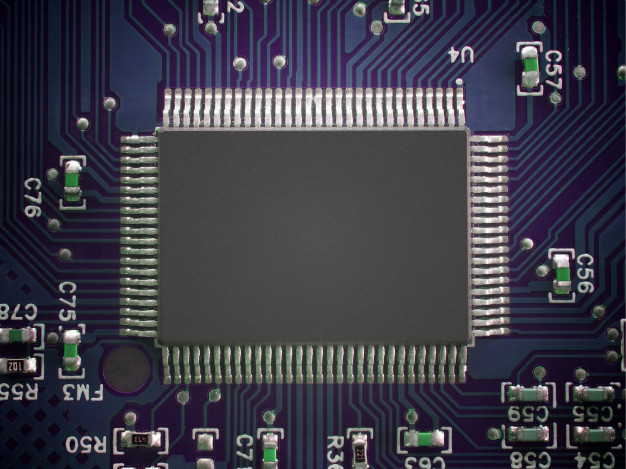

'Image as-is:'

None

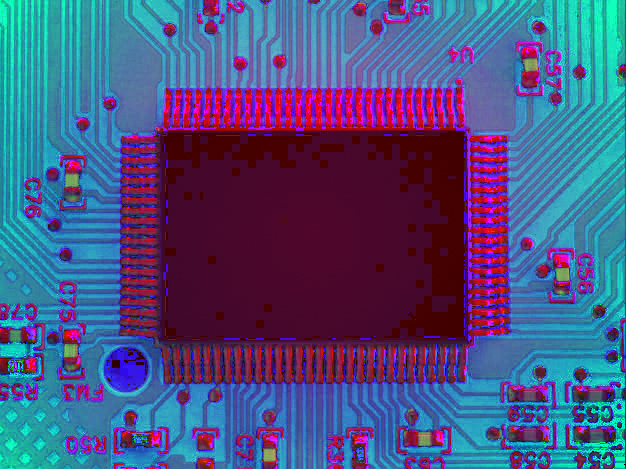

'Image with modified color space'

None

Selective Search took 5.545838832855225 s
Found 4272 proposed objects


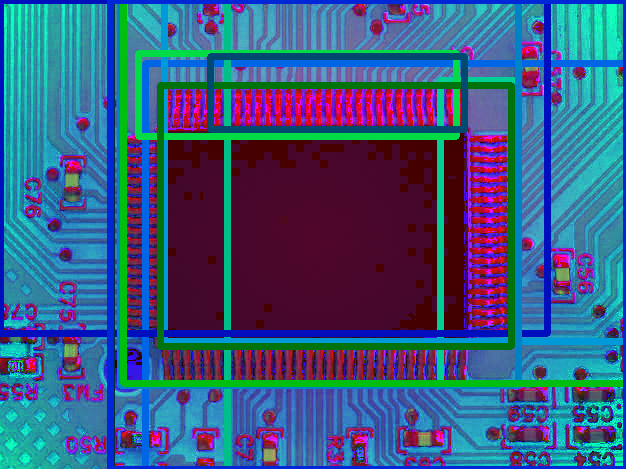

None

In [7]:
# from doSelectiveSearch import *

# path = os.path.join("/content","tball.jpeg")
# path = os.path.join("/content","cherry.png")
path = os.path.join("/content","data", "Positive", "18.jpg")
# path = os.path.join("/content","data", "Negative", "6.jpg")

doSelectiveSearch(inputImgPath=path, fastNotAccurate=True, showImage=False, numOfObjectsPerImage=20)#, changeColorSpace=False)